In [1]:
# mouse volcano

In [2]:
import sys
import os
from itertools import chain
from collections import defaultdict
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision', 3)
import gseapy as gp
import goatools
import numpy as np
import seaborn as sns
from adjustText import adjust_text

sns.set_style('whitegrid')
obodag = goatools.obo_parser.GODag('go-basic.obo')
sys.path.insert(0, "/home/gstupp/projects/metaproteomics")
from metaproteomics import utils
#from metaproteomics.analysis import build_loci

BASE = '../out/'

load obo file go-basic.obo
go-basic.obo: fmt(1.2) rel(2017-03-16) 48,478 GO Terms


In [114]:
keep_names = (['Igha', 'IgJ', 'Pigr', 'Mpo', 'Gzma', 'Ltf', 'S100A8', 'S100A9', 'Muc2'] + 
        ['serpina3k,serpina3m', 'Serpinc1', 'serpina3n,serpina3f', 'Serping1', 'serpina1a,serpina1d,serpina1c,serpina1e,serpina1b', 'mug2,mug1', 'Pzp'] +
        ['Reg1', 'Reg2', 'Reg3a', 'reg3g,reg3b'])
keep_names = set([x.lower() for x in keep_names])

In [136]:
def plot(df_sig, df_insig):
    fig = plt.figure(figsize=(15, 9))
    fig.set_tight_layout(False)
    ax = fig.add_subplot(111)

    # Plot the INsig points
    X = df_insig['log2FoldChange'].values
    Y = df_insig['-logp'].values
    ax.scatter(X, Y, color='silver', s=20)

    # Plot the sig points
    X = df_sig['log2FoldChange'].values
    Y = df_sig['-logp'].values
    ax.scatter(X, Y, color='black', s=20)

    texts = []
    X = df_sig['log2FoldChange'].values
    Y = df_sig['-logp'].values
    plotted_names = set()
    for name, x, y in zip(df_sig['gn'], X, Y):
        if isinstance(name, str) and name.lower() in keep_names:
            texts.append(plt.text(x, y, name, size = 12, weight='extra bold'))
            plotted_names.add(name.lower())
        elif abs(x) >= 1.5 and y >= 5 and name != '' and isinstance(name, str) and len(name)<10:
            texts.append(plt.text(x, y, name, size = 12, weight='extra bold'))

    ax.xaxis.set_label_text("Log(2) Fold Change")
    ax.yaxis.set_label_text("-logp")
    ax.set_xlim(-10.5,10.5)
    ax.set_ylim(0,50)
    #ax.legend(loc=2, fontsize='x-large')
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
    return plotted_names

In [137]:
s = "hpo,hPo"
fix_dupe_names = lambda s: ",".join(set(map(str.lower,s.split(",")))) if isinstance(s, str) else None
fix_dupe_names(s)

'hpo'

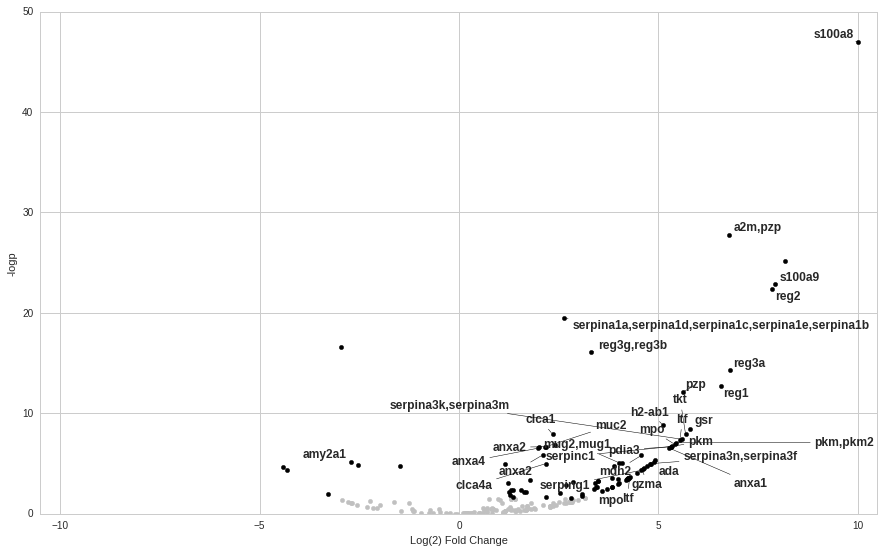

In [138]:
df = pd.read_csv(os.path.join(BASE,"RT_control_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df.gn = df.gn.apply(fix_dupe_names)
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
plotted_names = plot(df_sig, df_insig)

In [139]:
keep_names - plotted_names

{'igha', 'igj', 'pigr'}

In [140]:
df_sig[df_sig.gn.str.count("pigr")>=1]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gn,gn1,human_mouse,lca,name,go,go_name,-logp


In [141]:
df[df.gn.str.count('pigr')==1.]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gn,gn1,human_mouse,lca,name,go,go_name,-logp
165646313,7.638,-2.778,1.366,-2.034,0.042,0.309,pigr,Pigr,True,mus musculus,sp|O70570|PIGR_MOUSE Polymeric immunoglobulin ...,GO:0005515,protein binding,1.173


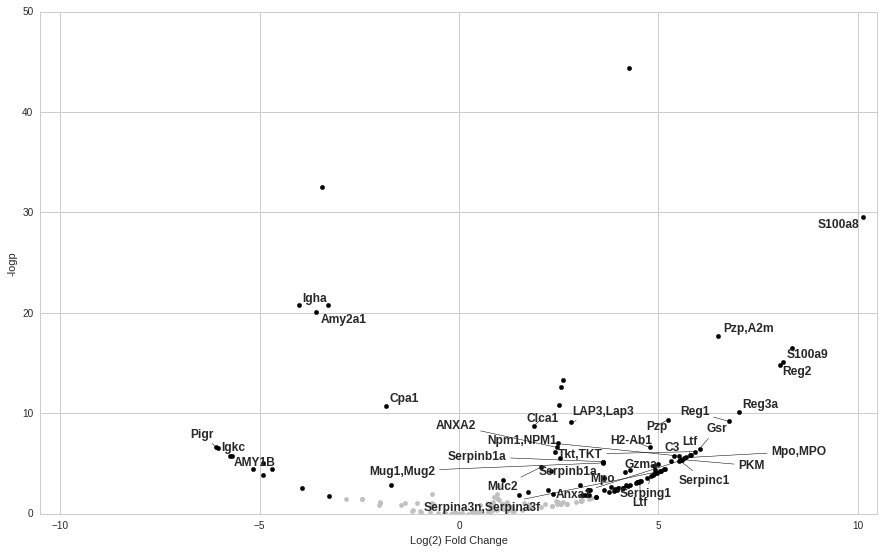

In [142]:
df = pd.read_csv(os.path.join(BASE,"RT_WT_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
_=plot(df_sig, df_insig)

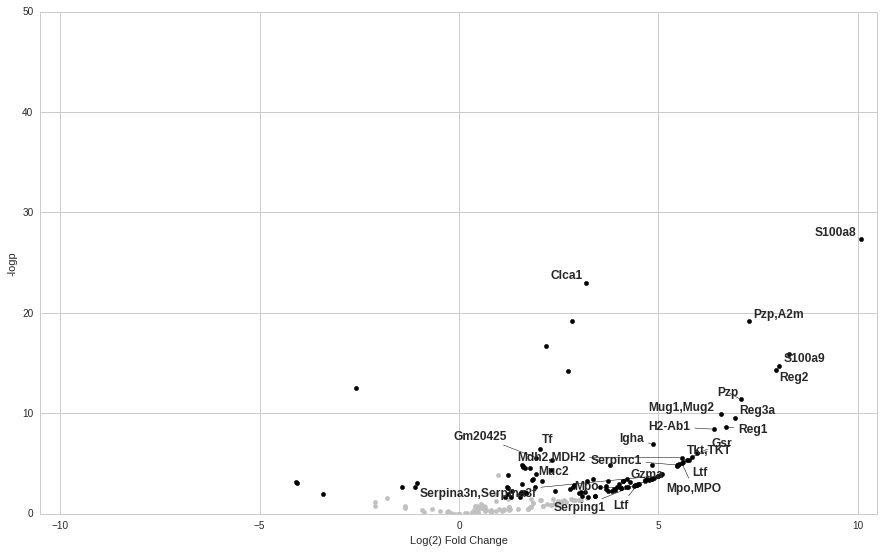

In [143]:
df = pd.read_csv(os.path.join(BASE,"RT_Rag_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
_=plot(df_sig, df_insig)

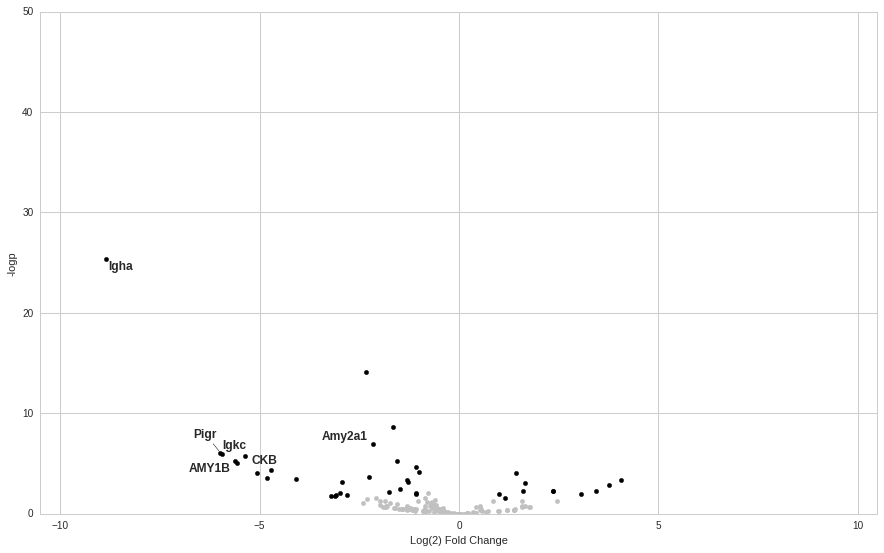

In [144]:
df = pd.read_csv(os.path.join(BASE,"Rag_WT_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
_=plot(df_sig, df_insig)